![EncabezadoIN](EncabezadoIN.JPG)

## Laboratorio 1 - Agrupación (Clustering)

Integrantes: 
Juan Pablo Lora Hernández - 202012524 
Andrés Francisco Borda Rincón - 
Gabriela Vargas Rojas - 
## Caso 
Los sistemas de recomendación han revolucionado la forma en que los usuarios descubren contenido en plataformas de streaming. Estos sistemas utilizan técnicas de aprendizaje automático para predecir las preferencias de los usuarios y ofrecerles contenido relevante. Así, uno de los desafíos clave para este laboratorio, en la construcción de estos sistemas es identificar las características de las películas que influyen en las calificaciones y gustos de los usuarios.
El comprender mejor el aporte que pueden brindar los sistemas de recomendación a una empresa de streaming, motivó a MovieAlpes a iniciar este proyecto. MovieAlpes es una empresa de streaming que quiere ser más efectiva en sus recomendaciones para mantener a sus usuarios satisfechos y, a su vez, capturar nuevos espectadores. Para ello, ha decidido emprender un proyecto para conocer cuáles son los factores que inciden en las calificaciones positivas de los productos que ofrece y entender mejor a sus usuarios. Para realizar este estudio ha recopilado un conjunto de datos que contiene información detallada sobre un amplio espectro de películas, series y mini series de TV, que incluye género, año de lanzamiento, duración, puntuación, entre otros atributos relevantes.
MovieAlpes los ha contactado para realizar este proceso de caracterización e identificación de patrones que puedan ser utilizados para entender las preferencias de sus usuarios e identificar los atributos que influyen en las calificaciones positivas. La idea es mejorar significativamente la experiencia de estos al proporcionar recomendaciones más relevantes y adaptadas a sus gustos individuales. Dados los procesos internos que en la actualidad lleva a cabo MovieAlpes a nivel de aprendizaje automático, requiere que la solución que brinde al problema plateado, sea basada en una tarea de agrupación.

## 1. Carga de librerías necesarias para implementación

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## 2. Cargar los datos

In [3]:
# Se cargan los datos. 
df_movies=pd.read_csv('./Datos_Agrupación_data_MovieAlpes_data.csv', sep=';', encoding = "ISO-8859-1")

## 3. Entendimiento de los datos 

### 3.1. Perfilamiento de datos

In [4]:
df_movies.shape

(7471, 18)

In [5]:
df_movies.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [6]:
# Revisar las características de los datos: completitud y tipo de dato
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [7]:
# Resumen de los estadisticos de las variables numéricas
df_movies_num = df_movies[['#', 'index', 'startYear', 'averageRating', 'ordering', 'numVotes']].copy()
df_movies_num.describe()


,#,index,startYear,averageRating,ordering,numVotes
count,7471.000000,7471.000000,7470.000000,7470.000000,7470.000000,7.470000e+03
mean,4043.482666,5440.458439,2013.157296,7.475676,16.567604,7.282830e+04
std,2192.753689,2752.820924,6.979151,2.771444,12.761147,1.640233e+05
min,1.000000,1.000000,1990.000000,6.500000,1.000000,1.000000e+01
25%,2152.500000,3073.500000,2008.000000,6.900000,6.000000,6.265250e+03
50%,4033.000000,5421.000000,2015.000000,7.300000,14.000000,1.527900e+04
75%,5914.500000,7641.500000,2019.000000,7.800000,24.000000,5.641975e+04
max,7849.000000,10274.000000,2023.000000,92.000000,119.000000,2.197234e+06


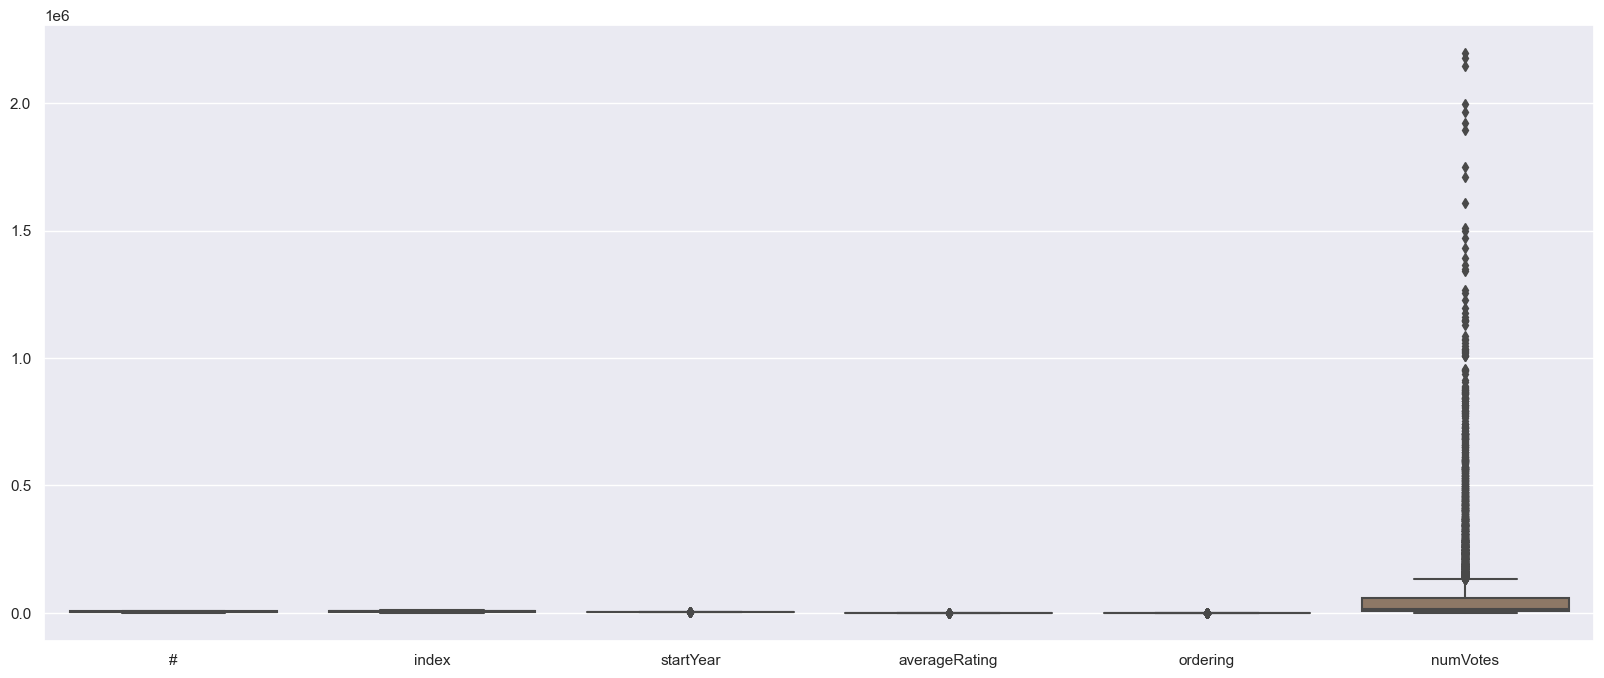

In [8]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies_num, orient ="v")


In [9]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

In [10]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_movies[name_cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0395843,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


### 3.2. Análisis de calidad de datos

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [11]:
# Cálculo de porcentaje de valores nulos por columna
((df_movies.isnull().sum()/df_movies.shape[0])).sort_values(ascending=False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

### 3.2.2 Unicidad

In [12]:
#Se revisa si hay registros duplicados
df_movies.duplicated(keep = False).sum()

6

### 3.2.3 Consistencia

In [13]:
# Se revisa la variable titleType 
df_movies.titleType.value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

### 3.2.4 Validez

Para la columna “runtimeMinutes” hay 98 registros que a pesar de no estar vacíos tienen como información “/N” lo cual no es un dato válido teniendo en cuenta que aquí encontramos información sobre la duración de la película o serie. De esta manera, en este campo para esos 98 registros no hay una validez. Este analisis fue realizado con Power BI al cargar los datos y con filtros en Excel

### 3.2.5 Reporte Automático con Profiling


In [14]:
#import pandas_profiling

#profiling =pandas_profiling.ProfileReport(df_movies)
#profiling

### 4.1 Preparar los datos

### 4.1.1 Selección de Variables a Utilizar - Corrección de Datos


In [15]:
# Identificar los registros incorrectos
registros_incorrectos = df_movies[(df_movies['averageRating'] == 68) | (df_movies['averageRating'] == 92)]

In [16]:
# Corregir los valores incorrectos
df_movies.loc[registros_incorrectos.index, 'averageRating'] = registros_incorrectos['averageRating'] / 10.0
# Verificar que los registros corregidos tengan los valores correctos
registros_verificados = df_movies.loc[registros_incorrectos.index]
print(registros_verificados)

         #  index      tconst titleType                        originalTitle  \
6       64    227  tt10687506     movie    The Electrical Life of Louis Wain   
51     242    643   tt4121306     movie                             Lac Gioi   
68     286    734   tt6428150     movie                           Free Dance   
385    653   1214   tt0258000     movie                           Panic Room   
387    656   1219   tt0259534     movie  Ramayana: The Legend of Prince Rama   
558    828   1427   tt0323298     movie                           The Mother   
1281  1561   2347   tt0944947  tvSeries                      Game of Thrones   
1544  1827   2680  tt10741542     movie                               Sherni   
1808  2092   3007  tt11717394  tvSeries                      Country Comfort   
2059  2347   3324  tt12861850     movie             Chandigarh Kare Aashiqui   
2606  2900   4018  tt15341442  tvSeries              The Croods: Family Tree   
3053  3348   4569   tt1884268     movie 

In [17]:
#Registro vacío a eliminar con su #
registro_a_eliminar = 3367
df_movies_model = df_movies[df_movies['#'] != registro_a_eliminar].copy()

#comprobación
print("Número de filas después de eliminar:", df_movies_model.shape[0])

Número de filas después de eliminar: 7470


In [18]:
# Eliminar registros duplicados y quedarse con uno de cada conjunto de duplicados
df_movies_model.drop_duplicates(inplace=True)
#Se revisa si hay registros duplicados
df_movies_model.duplicated(keep = False).sum()



0

In [19]:
def corregir_titleType(variacion):
    if variacion in ["MOVIE", "MOvie", "Movie"]:
        return "movie"
    else:
        return variacion

# Aplicar la función a la columna titleType
df_movies_model['titleType'] = df_movies_model['titleType'].apply(corregir_titleType)

# Verificar nuevamente la variable titleType después de corregir
df_movies_model.titleType.value_counts()

movie           4680
tvSeries        2338
tvMiniSeries     379
tvMovie           70
Name: titleType, dtype: int64